In [243]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc3 as pm
import arviz as az 

sns.set()

%load_ext watermark
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
arviz   0.11.2
seaborn 0.10.1
numpy   1.19.1
pymc3   3.11.2
pandas  1.1.0
last updated: Tue Jul 20 2021 

CPython 3.8.6
IPython 7.17.0
watermark 2.0.2


In [244]:
df = pd.DataFrame({'cases_treatment' : [95,133,175,127,134,90,23,2],
                  'cases_no_treatment' : [25,33,33,18,16,7,2,0],
                  'pct_pop_treatment' : [0.78,0.83,0.86,0.89,0.91,0.95,0.94,0.93]},
                  index=['20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'])

df.index.name='age'
df

,cases_treatment,cases_no_treatment,pct_pop_treatment
age,,,
20-29,95,25,0.78
30-39,133,33,0.83
40-49,175,33,0.86
50-59,127,18,0.89
60-69,134,16,0.91
70-79,90,7,0.95
80-89,23,2,0.94
90+,2,0,0.93


In [245]:
### test effect of more data ###
#df[['cases_treatment','cases_no_treatment']] *= 10

#df.loc['80-89',['cases_treatment','cases_no_treatment']] = [134,16]
df

,cases_treatment,cases_no_treatment,pct_pop_treatment
age,,,
20-29,95,25,0.78
30-39,133,33,0.83
40-49,175,33,0.86
50-59,127,18,0.89
60-69,134,16,0.91
70-79,90,7,0.95
80-89,23,2,0.94
90+,2,0,0.93


In [246]:
df['pct_treatment_of_cases'] = df['cases_treatment'] / (df['cases_treatment'] + df['cases_no_treatment'])
df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases
age,,,,
20-29,95,25,0.78,0.791667
30-39,133,33,0.83,0.801205
40-49,175,33,0.86,0.841346
50-59,127,18,0.89,0.875862
60-69,134,16,0.91,0.893333
70-79,90,7,0.95,0.927835
80-89,23,2,0.94,0.920000
90+,2,0,0.93,1.000000


In [247]:
### assume population in each age group is 1000000 ###

POP = 1e3

df['pop_treatment'] = POP * df['pct_pop_treatment']
df['pop_non_treatment'] = POP * (1 - df['pct_pop_treatment'])

df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases,pop_treatment,pop_non_treatment
age,,,,,,
20-29,95,25,0.78,0.791667,780.0,220.0
30-39,133,33,0.83,0.801205,830.0,170.0
40-49,175,33,0.86,0.841346,860.0,140.0
50-59,127,18,0.89,0.875862,890.0,110.0
60-69,134,16,0.91,0.893333,910.0,90.0
70-79,90,7,0.95,0.927835,950.0,50.0
80-89,23,2,0.94,0.920000,940.0,60.0
90+,2,0,0.93,1.000000,930.0,70.0


In [248]:
df['incidence_treatment'] = df['cases_treatment'] / df['pop_treatment']
df['incidence_non_treatment'] = df['cases_no_treatment'] / df['pop_non_treatment']

df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases,pop_treatment,pop_non_treatment,incidence_treatment,incidence_non_treatment
age,,,,,,,,
20-29,95,25,0.78,0.791667,780.0,220.0,0.121795,0.113636
30-39,133,33,0.83,0.801205,830.0,170.0,0.160241,0.194118
40-49,175,33,0.86,0.841346,860.0,140.0,0.203488,0.235714
50-59,127,18,0.89,0.875862,890.0,110.0,0.142697,0.163636
60-69,134,16,0.91,0.893333,910.0,90.0,0.147253,0.177778
70-79,90,7,0.95,0.927835,950.0,50.0,0.094737,0.140000
80-89,23,2,0.94,0.920000,940.0,60.0,0.024468,0.033333
90+,2,0,0.93,1.000000,930.0,70.0,0.002151,0.000000


In [249]:
df['rel_diff'] = df['incidence_treatment'] / df['incidence_non_treatment']
df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases,pop_treatment,pop_non_treatment,incidence_treatment,incidence_non_treatment,rel_diff
age,,,,,,,,,
20-29,95,25,0.78,0.791667,780.0,220.0,0.121795,0.113636,1.071795
30-39,133,33,0.83,0.801205,830.0,170.0,0.160241,0.194118,0.825484
40-49,175,33,0.86,0.841346,860.0,140.0,0.203488,0.235714,0.863284
50-59,127,18,0.89,0.875862,890.0,110.0,0.142697,0.163636,0.872035
60-69,134,16,0.91,0.893333,910.0,90.0,0.147253,0.177778,0.828297
70-79,90,7,0.95,0.927835,950.0,50.0,0.094737,0.140000,0.676692
80-89,23,2,0.94,0.920000,940.0,60.0,0.024468,0.033333,0.734043
90+,2,0,0.93,1.000000,930.0,70.0,0.002151,0.000000,inf


In [250]:
df['rel_diff'].replace(np.inf,np.nan,inplace=True)
df['efficacy'] = 1 - df['rel_diff']
df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases,pop_treatment,pop_non_treatment,incidence_treatment,incidence_non_treatment,rel_diff,efficacy
age,,,,,,,,,,
20-29,95,25,0.78,0.791667,780.0,220.0,0.121795,0.113636,1.071795,-0.071795
30-39,133,33,0.83,0.801205,830.0,170.0,0.160241,0.194118,0.825484,0.174516
40-49,175,33,0.86,0.841346,860.0,140.0,0.203488,0.235714,0.863284,0.136716
50-59,127,18,0.89,0.875862,890.0,110.0,0.142697,0.163636,0.872035,0.127965
60-69,134,16,0.91,0.893333,910.0,90.0,0.147253,0.177778,0.828297,0.171703
70-79,90,7,0.95,0.927835,950.0,50.0,0.094737,0.140000,0.676692,0.323308
80-89,23,2,0.94,0.920000,940.0,60.0,0.024468,0.033333,0.734043,0.265957
90+,2,0,0.93,1.000000,930.0,70.0,0.002151,0.000000,NaN,NaN


In [251]:
df[['incidence_treatment','incidence_non_treatment']].melt().mean()

value    0.12219
dtype: float64

In [252]:
cases = df[['cases_treatment','cases_no_treatment']].melt()
cases.columns = ['treatment_status','cases']

pop = df[['pop_treatment','pop_non_treatment']].melt()
pop.columns = ['pop','count']

combined_df = pd.concat([cases,pop],axis=1)
combined_df['age'] = np.tile(df.index.values,2)
combined_df['treatment_idx'] = combined_df['treatment_status'].apply(lambda x : 0 if 'no_treatment' in x else 1 )
combined_df['age_idx'] = np.tile([0,1,2,3,4,5,6,7],2)
combined_df.drop([7,15],inplace=True)

combined_df

,treatment_status,cases,pop,count,age,treatment_idx,age_idx
0,cases_treatment,95,pop_treatment,780.0,20-29,1,0
1,cases_treatment,133,pop_treatment,830.0,30-39,1,1
2,cases_treatment,175,pop_treatment,860.0,40-49,1,2
3,cases_treatment,127,pop_treatment,890.0,50-59,1,3
4,cases_treatment,134,pop_treatment,910.0,60-69,1,4
5,cases_treatment,90,pop_treatment,950.0,70-79,1,5
6,cases_treatment,23,pop_treatment,940.0,80-89,1,6
8,cases_no_treatment,25,pop_non_treatment,220.0,20-29,0,0
9,cases_no_treatment,33,pop_non_treatment,170.0,30-39,0,1
10,cases_no_treatment,33,pop_non_treatment,140.0,40-49,0,2


In [275]:
### partially pooled hierarchical model with shrinkage ###

def logit_pure(x):
    return (np.exp(x)) / (1 + np.exp(x))

def logistic_pure(p):
    return np.log(p / (1 - p))


with pm.Model() as model:
    alpha_bar = pm.Normal('alpha_bar',mu=0,sd=1.5)
    sigma = pm.Exponential('sigma',1)
    
    alpha = pm.Normal('alpha',mu=alpha_bar,sd=sigma,shape=2)
    
    p_alpha = pm.Deterministic('p_alpha',logit_pure(alpha))
        
    p_alpha_diff = pm.Deterministic('p_alpha_diff',p_alpha[1] - p_alpha[0])
    
    p_alpha_rel_diff = pm.Deterministic('p_alpha_rel_diff',p_alpha[1] / p_alpha[0])
    
    efficacy = pm.Deterministic('efficacy',1 - p_alpha_rel_diff)
    
    obs = pm.Binomial('obs',n=combined_df['count'],p=logit_pure(alpha[combined_df['treatment_idx']]),
                      observed=combined_df['cases'])
    
    trace = pm.sample(500,tune=500,target_accept=0.99)

<ipython-input-275-ab5e6326105b>:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(500,tune=500,target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, sigma, alpha_bar]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 6 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


                   mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
alpha_bar        -1.664  0.496    -2.365     -1.027      0.032    0.023   
alpha[0]         -1.670  0.097    -1.818     -1.509      0.005    0.004   
alpha[1]         -1.933  0.039    -1.993     -1.868      0.002    0.001   
sigma             0.572  0.617     0.025      1.177      0.043    0.031   
p_alpha[0]        0.159  0.013     0.140      0.181      0.001    0.001   
p_alpha[1]        0.127  0.004     0.120      0.134      0.000    0.000   
p_alpha_diff     -0.032  0.014    -0.052     -0.009      0.001    0.001   
p_alpha_rel_diff  0.802  0.070     0.679      0.904      0.004    0.003   
efficacy          0.198  0.070     0.096      0.321      0.004    0.003   

                  ess_bulk  ess_tail  r_hat  
alpha_bar            331.0     249.0   1.00  
alpha[0]             327.0     435.0   1.01  
alpha[1]             586.0     636.0   1.00  
sigma                157.0     315.0   1.01  
p_alpha[0]         

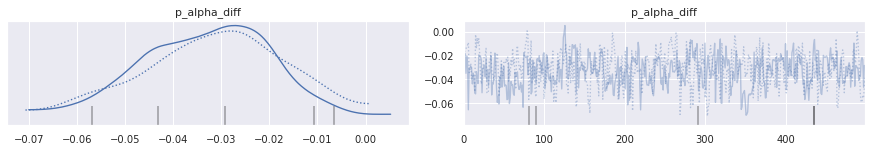

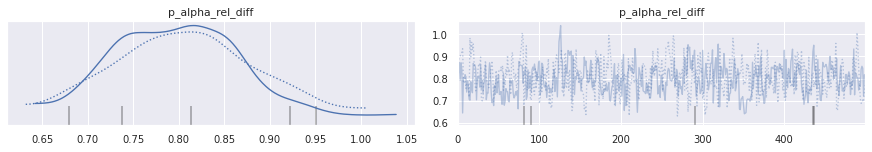

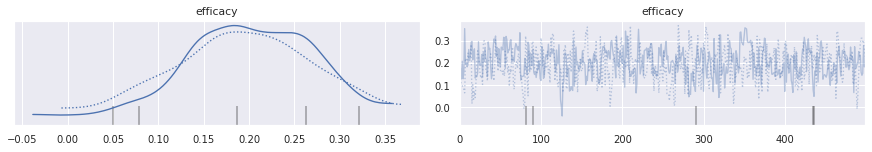

In [276]:
with model:
    print(az.summary(trace,hdi_prob=0.89))
    
    az.plot_trace(trace,var_names=['p_alpha_diff'])
    az.plot_trace(trace,var_names='p_alpha_rel_diff')
    az.plot_trace(trace,var_names='efficacy')

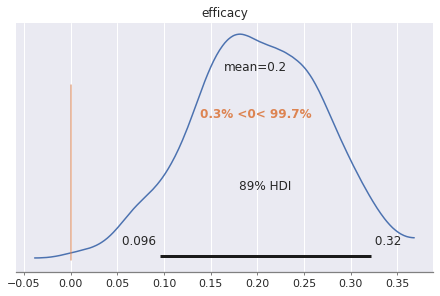

In [278]:
with model:
    az.plot_posterior(trace,var_names='efficacy',ref_val=0,hdi_prob=0.89)
plt.savefig('ARVIZ_posterior.jpg',format='jpg')

In [279]:
df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases,pop_treatment,pop_non_treatment,incidence_treatment,incidence_non_treatment,rel_diff,efficacy,bayes_efficacy,eff_delta
age,,,,,,,,,,,,
20-29,95,25,0.78,0.791667,780.0,220.0,0.121795,0.113636,1.071795,-0.071795,-0.088,-0.016205
30-39,133,33,0.83,0.801205,830.0,170.0,0.160241,0.194118,0.825484,0.174516,0.130,-0.044516
40-49,175,33,0.86,0.841346,860.0,140.0,0.203488,0.235714,0.863284,0.136716,0.077,-0.059716
50-59,127,18,0.89,0.875862,890.0,110.0,0.142697,0.163636,0.872035,0.127965,0.073,-0.054965
60-69,134,16,0.91,0.893333,910.0,90.0,0.147253,0.177778,0.828297,0.171703,0.104,-0.067703
70-79,90,7,0.95,0.927835,950.0,50.0,0.094737,0.140000,0.676692,0.323308,0.243,-0.080308
80-89,23,2,0.94,0.920000,940.0,60.0,0.024468,0.033333,0.734043,0.265957,0.483,0.217043
90+,2,0,0.93,1.000000,930.0,70.0,0.002151,0.000000,NaN,NaN,NaN,NaN


In [258]:
with model:
    print (az.summary(trace,var_names='efficacy',hdi_prob=0.89))

              mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
efficacy[0] -0.088  0.227    -0.416      0.267      0.002    0.002   16897.0   
efficacy[1]  0.130  0.151    -0.093      0.373      0.001    0.001   15240.0   
efficacy[2]  0.077  0.158    -0.161      0.326      0.001    0.002   14679.0   
efficacy[3]  0.073  0.209    -0.215      0.405      0.002    0.002   15774.0   
efficacy[4]  0.104  0.216    -0.204      0.438      0.002    0.002   15850.0   
efficacy[5]  0.243  0.259    -0.102      0.608      0.002    0.002   15594.0   
efficacy[6]  0.483  0.270     0.178      0.815      0.003    0.002   14298.0   

             ess_tail  r_hat  
efficacy[0]    7520.0    1.0  
efficacy[1]    7335.0    1.0  
efficacy[2]    6766.0    1.0  
efficacy[3]    7789.0    1.0  
efficacy[4]    7833.0    1.0  
efficacy[5]    7737.0    1.0  
efficacy[6]    7640.0    1.0  


efficacy[0]   -0.087
efficacy[1]    0.130
efficacy[2]    0.086
efficacy[3]    0.066
efficacy[4]    0.110
efficacy[5]    0.240
efficacy[6]    0.472

efficacy[6]    0.483
efficacy[5]    0.243
efficacy[4]    0.104
efficacy[3]    0.073
efficacy[2]    0.077
efficacy[1]    0.130
efficacy[0]   -0.088
Name: mean, dtype: float64
[ 0.     2.475  4.95   7.425  9.9   12.375 14.85 ]


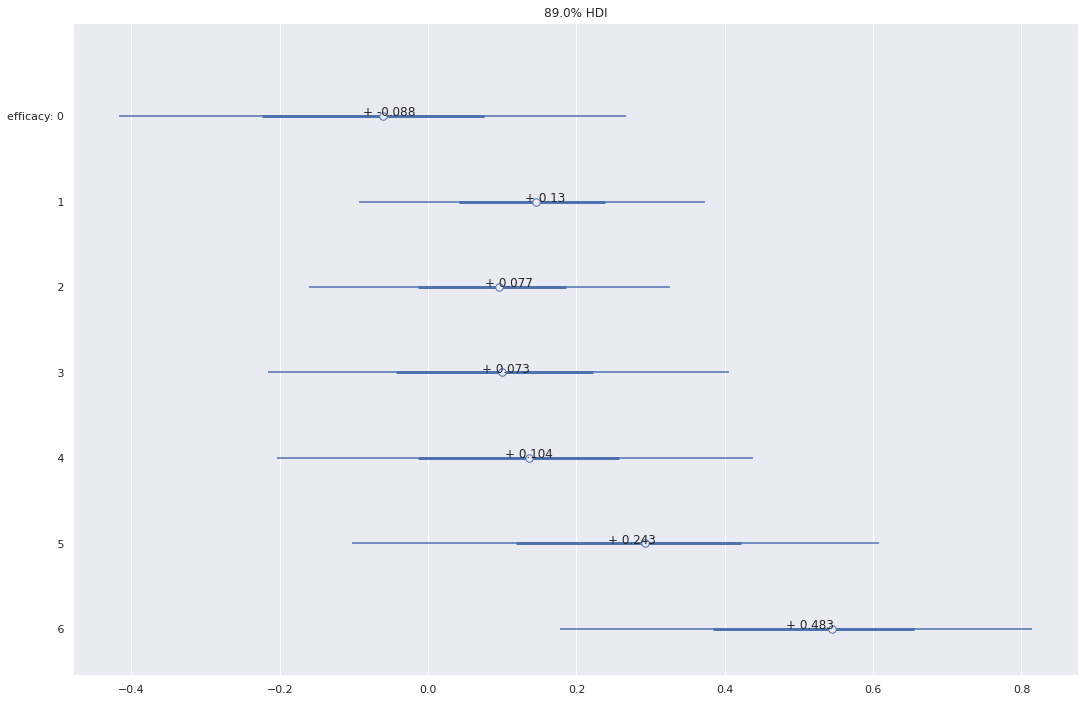

In [259]:
fig,ax = plt.subplots(figsize=(18,12))

with model:
    az.plot_forest(trace,var_names='efficacy',hdi_prob=0.89,combined=True,figsize=(18,12),markersize=10,ax=ax)

    #for n in az.summary(trace,var_names='efficacy')['mean']:
        #ax.axvline (n,color='orange',ls='dashed')
    
    x = az.summary(trace,var_names='efficacy')['mean'][::-1]
    y = ax.yaxis.get_ticklocs()
    
    print (x)
    print (y)
    
    points = list(zip(x,y))
    for i,p in enumerate(points):
        
        ax.annotate('+ ' + str(x[i]),p)
    
plt.savefig('ARVIZ_forest.jpg',format='jpg')

In [260]:
to_df = pm.trace_to_dataframe(trace)

to_df.describe()

,alpha_bar,alpha__0_0,alpha__0_1,alpha__0_2,alpha__0_3,alpha__0_4,alpha__0_5,alpha__0_6,alpha__1_0,alpha__1_1,...,p_alpha_rel_diff__4,p_alpha_rel_diff__5,p_alpha_rel_diff__6,efficacy__0,efficacy__1,efficacy__2,efficacy__3,efficacy__4,efficacy__5,efficacy__6
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.898931,-2.048354,-1.476419,-1.254378,-1.677151,-1.595041,-1.873131,-2.731797,-1.977841,-1.665173,...,0.895723,0.757317,0.517479,-0.088295,0.130253,0.076573,0.072883,0.104277,0.242683,0.482521
std,0.193113,0.205505,0.187017,0.198436,0.240560,0.262921,0.347011,0.450280,0.106868,0.092938,...,0.216198,0.259108,0.270353,0.226558,0.150781,0.157758,0.209128,0.216198,0.259108,0.270353
min,-2.930243,-2.791899,-2.294728,-1.916878,-2.807420,-2.799112,-3.415366,-4.979698,-2.413193,-2.065796,...,0.402049,0.251445,0.098716,-1.337979,-0.939695,-0.756127,-1.523474,-1.596269,-2.030526,-4.519573
25%,-2.022417,-2.184088,-1.601440,-1.386020,-1.836571,-1.768735,-2.101112,-3.007282,-2.049776,-1.726748,...,0.743274,0.578593,0.345284,-0.223757,0.041635,-0.013563,-0.043600,-0.012927,0.119146,0.384615
50%,-1.901103,-2.045067,-1.473714,-1.250910,-1.673297,-1.589603,-1.857351,-2.696317,-1.975601,-1.664789,...,0.864336,0.707940,0.456095,-0.061057,0.145018,0.095029,0.100321,0.135664,0.292060,0.543905
75%,-1.777439,-1.902139,-1.350399,-1.119281,-1.514148,-1.413619,-1.635326,-2.415124,-1.904164,-1.602518,...,1.012927,0.880854,0.615385,0.075873,0.237894,0.185523,0.222797,0.256726,0.421407,0.654716
max,-0.950135,-1.325736,-0.779921,-0.606181,-0.664028,-0.628880,-0.696935,-1.156159,-1.597760,-1.329924,...,2.596269,3.030526,5.519573,0.463023,0.533830,0.499239,0.603123,0.597951,0.748555,0.901284


In [261]:
df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases,pop_treatment,pop_non_treatment,incidence_treatment,incidence_non_treatment,rel_diff,efficacy
age,,,,,,,,,,
20-29,95,25,0.78,0.791667,780.0,220.0,0.121795,0.113636,1.071795,-0.071795
30-39,133,33,0.83,0.801205,830.0,170.0,0.160241,0.194118,0.825484,0.174516
40-49,175,33,0.86,0.841346,860.0,140.0,0.203488,0.235714,0.863284,0.136716
50-59,127,18,0.89,0.875862,890.0,110.0,0.142697,0.163636,0.872035,0.127965
60-69,134,16,0.91,0.893333,910.0,90.0,0.147253,0.177778,0.828297,0.171703
70-79,90,7,0.95,0.927835,950.0,50.0,0.094737,0.140000,0.676692,0.323308
80-89,23,2,0.94,0.920000,940.0,60.0,0.024468,0.033333,0.734043,0.265957
90+,2,0,0.93,1.000000,930.0,70.0,0.002151,0.000000,NaN,NaN


In [262]:
df.loc[:'80-89','bayes_efficacy'] = x[::-1].values
df['eff_delta'] = df['bayes_efficacy'] - df['efficacy']
df

,cases_treatment,cases_no_treatment,pct_pop_treatment,pct_treatment_of_cases,pop_treatment,pop_non_treatment,incidence_treatment,incidence_non_treatment,rel_diff,efficacy,bayes_efficacy,eff_delta
age,,,,,,,,,,,,
20-29,95,25,0.78,0.791667,780.0,220.0,0.121795,0.113636,1.071795,-0.071795,-0.088,-0.016205
30-39,133,33,0.83,0.801205,830.0,170.0,0.160241,0.194118,0.825484,0.174516,0.130,-0.044516
40-49,175,33,0.86,0.841346,860.0,140.0,0.203488,0.235714,0.863284,0.136716,0.077,-0.059716
50-59,127,18,0.89,0.875862,890.0,110.0,0.142697,0.163636,0.872035,0.127965,0.073,-0.054965
60-69,134,16,0.91,0.893333,910.0,90.0,0.147253,0.177778,0.828297,0.171703,0.104,-0.067703
70-79,90,7,0.95,0.927835,950.0,50.0,0.094737,0.140000,0.676692,0.323308,0.243,-0.080308
80-89,23,2,0.94,0.920000,940.0,60.0,0.024468,0.033333,0.734043,0.265957,0.483,0.217043
90+,2,0,0.93,1.000000,930.0,70.0,0.002151,0.000000,NaN,NaN,NaN,NaN
